# Science Case 5:   NGC3504 

The galaxy NGC3504 has been observed in two unrelated ALMA projects, both in band 6 at at 230 GHz, cause for an interesting comparison.

1. **2016.1.00650.S** - one 7m and two 12m observations of just NGC3504, to study flow in a bar
2. **2017.1.00964.S** - a collection of 7 galaxies with the purpose of measure gas flow near the central black hole. For NGC3504 two datasets were collected.

Here we are focusing on the commonalities and differences between these two observations.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
source = "NGC3504"

###  astroquery.alma

First we should query the science archive, we can do https://almascience.nrao.edu/aq/ as well, but we want also show this via the notebook. 


In [3]:
from astroquery.alma import Alma
import pandas as pd
# display the whole table in the notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',25)
# more to come here.  here we just want to show how much you can do with the current query, before science
alma = Alma()

In [4]:
n = Alma.query_object(source)

In [5]:
print(pd.unique(n['proposal_id']))
print(pd.unique(n['obs_id']))

[b'2017.1.00964.S' b'2016.1.00650.S']
[b'uid://A001/X1288/Xba6' b'uid://A001/X1288/Xba8' b'uid://A001/X87a/X70a'
 b'uid://A001/X87a/X708' b'uid://A001/X87a/X706']


Thus we have indeed two projects,and five observations across those two.

Lets print how many beams we have across the image

In [6]:
ci=['obs_id','s_fov','s_resolution']
n['nres'] = 3600*n['s_fov']/n['s_resolution']
print(n[ci])

        obs_id               s_fov             s_resolution    
                              deg                  deg         
--------------------- -------------------- --------------------
uid://A001/X1288/Xba6 0.006863718695429476 0.034121085407438106
uid://A001/X1288/Xba6 0.006863718695429476 0.034121085407438106
uid://A001/X1288/Xba6 0.006863718695429476 0.034121085407438106
uid://A001/X1288/Xba6 0.006863718695429476 0.034121085407438106
uid://A001/X1288/Xba8  0.00686371854646795  0.20065563262611036
uid://A001/X1288/Xba8  0.00686371854646795  0.20065563262611036
uid://A001/X1288/Xba8  0.00686371854646795  0.20065563262611036
uid://A001/X1288/Xba8  0.00686371854646795  0.20065563262611036
 uid://A001/X87a/X70a 0.017853666133604822    5.503583966319726
 uid://A001/X87a/X70a 0.017853666133604822    5.503583966319726
 uid://A001/X87a/X70a 0.017853666133604822    5.503583966319726
 uid://A001/X87a/X70a 0.017853666133604822    5.503583966319726
 uid://A001/X87a/X708  0.013051286737352

Notice there appears to be a units issue with s_resolution: they appear to be in arcsec. There is also a 'spatial_resolution', but it has the same issue.



### astroquery.admit

In [7]:
from astroquery.admit import ADMIT
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',25)


a = ADMIT()
a.check()

Found  /home/teuben/ALMA/study7/query/admit.db
Checking db.... 0
71 71 71
Database version: 27-feb-2022. core.py version: 26-feb-2022
header    : 1 entries
alma      : 124 entries
win       : 123 entries
lines     : 33 entries
sources   : 769 entries


# Continuum

First we want to see if any continuum is detected, so we select all windows with one channel.



In [8]:
p = a.query(source_name_alma=source,nchan=1,flux='>0')
print(p.shape)

select * from alma inner join win on (win.a_id = alma.id)  inner join sources on (sources.w_id = win.id)   WHERE alma.target_name='NGC3504' AND win.nchan=1 AND sources.flux>=0.0 AND sources.l_id = 0  

(23, 40)


In [9]:
a.key_description.show_in_notebook(display_length=20)

idx,Keyword,Description,Database Table
0,alma_id,ALMA ID,Window
1,win_id,Spectral window ID,Window
2,spw,Spectral window name,Window
3,nlines,Number of lines,Window
4,nsources,Number of sources,Window
5,nchan,Number of channels,Window
6,win_peak,Window peak flux,Window
7,win_rms,Window RMS noise,Window
8,win_snr,Window Signal to noise ratio (peak/rms),Window
9,bmaj,Beam major axis,Window


We collect a few observables: observing time, as well as peak and flux and the resolution

Note we need to clean up the units

In [10]:
ci=['obs_id','spw','nsources','t_min', 'flux', 'peak_s','fop','bmaj_arcsec','smaj_arcsec']
p['fop'] = p['flux']/p['peak_s']
p['bmaj_arcsec'] = p['bmaj'] * 3600
p['smaj_arcsec'] = p['smaj'] * 3600
print(p[ci])

                   obs_id             spw  nsources         t_min      flux  \
0   uid://A001/X1288/Xba6           spw21         1  58050.543677  0.000860   
1   uid://A001/X1288/Xba8           spw19         1  58119.297186  0.001110   
2   uid://A001/X1288/Xba8           spw21         1  58119.297186  0.001240   
3   uid://A001/X1288/Xba8           spw23         1  58119.297186  0.001790   
4   uid://A001/X1288/Xba8           spw25         1  58119.297186  0.001450   
5    uid://A001/X87a/X706           spw23         1  57713.452563  0.001730   
6    uid://A001/X87a/X706           spw25         1  57713.452563  0.001510   
7    uid://A001/X87a/X706           spw27         1  57713.452563  0.001560   
8    uid://A001/X87a/X706           spw29         1  57713.452563  0.001730   
9    uid://A001/X87a/X708           spw23         3  57830.136178  0.007700   
10   uid://A001/X87a/X708           spw23         3  57830.136178  0.013800   
11   uid://A001/X87a/X708           spw23         3 

It's a little surprising that flux/peak is 1.5  for the lowest and highest resolution array data, but there clearly is something very odd about the middle resolution (X708) data.

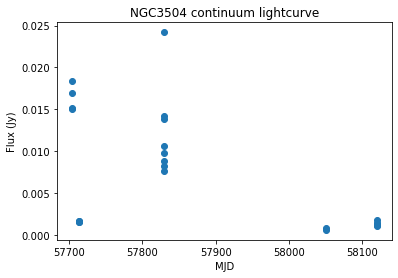

In [11]:
plt.scatter(p['t_min'],p['flux']);
plt.title(source + " continuum lightcurve")
plt.xlabel('MJD')
plt.ylabel('Flux (Jy)');

well, the fluxes are somewhat all over the place..... averaging 10-15 mJy.

The other dataset of NGC3504 at mjd > 58000 seems to have lost a lot of flux.

Here is a figure of the continuum source, as seen in the three different ALMA confirmation. Figures have been taking from ADMIT, including where sources were detected. ADMIT was using CASA's ia.findsources()

![NGC3504](NGC3504a.png)

# Spectral Lines

In [12]:
p = a.query(source_name_alma=source,nchan='>1',mom0flux='>0')

select * from alma inner join win on (win.a_id = alma.id)  inner join lines on (lines.w_id = win.id )  WHERE alma.target_name='NGC3504' AND win.nchan>=1.0 AND lines.mom0flux>=0.0 



In [13]:
p = a.query(nchan='>1',mom0flux='>0')

select * from alma inner join win on (win.a_id = alma.id)  inner join lines on (lines.w_id = win.id )  WHERE win.nchan>=1.0 AND lines.mom0flux>=0.0 



In [14]:
print(p.shape)
print(p.columns)



(33, 39)
Index(['id', 'obs_id', 'target_name', 's_ra', 's_dec', 'frequency', 't_min',
       'cont_sensitivity_bandwidth', 'sensitivity_10kms', 'project_abstract',
       'obs_title', 'science_keyword', 'scientific_category',
       'proposal_authors', 'id', 'a_id', 'spw', 'freqc', 'freqw', 'vlsr',
       'nlines', 'nsources', 'nchan', 'peak_w', 'rms_w', 'bmaj', 'bmin', 'bpa',
       'fcoverage', 'id', 'w_id', 'formula', 'transition', 'restfreq', 'vmin',
       'vmax', 'mom0flux', 'mom1peak', 'mom2peak'],
      dtype='object')


In [15]:
ci=['obs_id','spw','restfreq','formula','mom0flux','mom1peak','mom2peak']
ci=['spw','restfreq','formula','mom0flux','mom1peak','vlsr','mom2peak','nlines']
print(p[ci])

      spw   restfreq   formula    mom0flux  mom1peak         vlsr  mom2peak  \
0   spw21  243.48293    H2COH+   1863.8500  1457.430  1447.989431  31.01830   
1   spw23  244.59816     HCOOH   4235.2400  1427.340  1447.989431  31.75560   
2   spw23  244.59816     HCOOH    313.3270  1420.510  1447.989431  38.15480   
3   spw23  244.63395  CH3CH2OH    309.1810  1448.800  1447.989431  33.36400   
4   spw25  230.53800        CO   2698.2200  1475.480  1447.989431  20.86430   
5   spw23  244.93556        CS   3429.8800  1831.720  1521.106704  33.66740   
6   spw25  230.53800        CO   3388.7800  1516.190  1521.106704  34.98030   
7   spw23  244.93556        CS   1090.5600  1549.750  1521.106704  80.49340   
8   spw25  230.53800        CO  18313.7000  1547.690  1521.106704  58.09510   
9   spw16  230.53800        CO  11534.2000   639.522   628.000000  70.28280   
10  spw21  242.49769   CH3COOH    477.7500   241.190   232.006873  37.10220   
11  spw21  242.50962   CH3COOH      0.0000     0.000

To note here in the current set of tables the mom0flux values are probed at the location where in the CubeSum a source was detected.  There is no mom0flux value generated for the CubeSum, this might have been useful here to compare to.



One caveat: the CO line appears to be missing (Xba6,8), whereas the CS line is there....   which turned out to be because the CO cubes crashed in ADMIT (some I/O error).  